In [1]:
from tensorflow.keras.layers import Input,Conv2D,Concatenate,Add,SeparableConv2D,ReLU,ZeroPadding2D,DepthwiseConv2D,TimeDistributed,LSTM,GRU,Bidirectional
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense,BatchNormalization,Dropout,AveragePooling2D,Activation,GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
path = 'D:\\Tea_Data\\Train'
print(os.listdir(path))

['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [3]:
dataset_path_train = os.listdir('D:\\Tea_Data\\Train')
dataset_path_train

['algal leaf',
 'Anthracnose',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset_path_validation = os.listdir('D:\\Tea_Data\\Test')
dataset_path_validation

['algal leaf',
 'Anthracnose',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [6]:
print(dataset_path_train)

['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [7]:
print(dataset_path_validation)

['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [8]:
disease_items_train=[]

for item in dataset_path_train:
  all_disease = os.listdir('D:\\Tea_Data\\Train' +'\\'+item)
  for disease in all_disease:
    disease_items_train.append((item , str('D:\\Tea_Data\\Train'+'\\'+item ) +'\\'+disease ))

In [9]:
train_disease_df = pd.DataFrame(data=disease_items_train,columns = ['Train_Disease_Type' ,'Train_Disease_Image'])
train_disease_df.head()

,Train_Disease_Type,Train_Disease_Image
0,algal leaf,D:\Tea_Data\Train\algal leaf\horizontal_flip_U...
1,algal leaf,D:\Tea_Data\Train\algal leaf\horizontal_flip_U...
2,algal leaf,D:\Tea_Data\Train\algal leaf\horizontal_flip_U...
3,algal leaf,D:\Tea_Data\Train\algal leaf\horizontal_flip_U...
4,algal leaf,D:\Tea_Data\Train\algal leaf\horizontal_flip_U...


In [10]:
disease_items_test=[]

for item in dataset_path_validation:
  all_disease = os.listdir('D:\\Tea_Data\\Test'+'\\'+item)
  for disease in all_disease:
    disease_items_test.append((item , str('D:\\Tea_Data\\Test'+'\\'+item ) +'\\'+disease ))

In [11]:
test_disease_df = pd.DataFrame(data=disease_items_test,columns = ['Test_Disease_Type' ,'Test_Disease_Image'])
test_disease_df.head()

,Test_Disease_Type,Test_Disease_Image
0,algal leaf,D:\Tea_Data\Test\algal leaf\horizontal_flip_UN...
1,algal leaf,D:\Tea_Data\Test\algal leaf\horizontal_flip_UN...
2,algal leaf,D:\Tea_Data\Test\algal leaf\horizontal_flip_UN...
3,algal leaf,D:\Tea_Data\Test\algal leaf\horizontal_flip_UN...
4,algal leaf,D:\Tea_Data\Test\algal leaf\horizontal_flip_UN...


In [21]:
img_width = 224
img_height = 224
train_images = []
train_labels = []
path = 'D:\\Tea_Data\\Train\\'
for i in dataset_path_train:
  data_path = path+str(i)
  file_names = [i for i in os.listdir(data_path)]
  #print(file_names)
  for f in file_names:
    img = cv2.imread(data_path+'\\'+f)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(img_width,img_height))
    train_images.append(img)
    train_labels.append(i)

In [22]:
train_labels = np.array(train_labels)
print(train_labels)

['algal leaf' 'algal leaf' 'algal leaf' ... 'white spot' 'white spot'
 'white spot']


In [23]:
img_width = 224
img_height = 224
test_images = []
test_labels = []

path = 'D:\\Tea_Data\\Test\\'
for i in dataset_path_validation:
  data_path = path+str(i)
  file_names = [i for i in os.listdir(data_path)]
  #print(file_names)
  for f in file_names:
    img = cv2.imread(data_path+'\\'+f)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(img_width,img_height))
    test_images.append(img)
    test_labels.append(i)

In [24]:
test_labels = np.array(test_labels)
print(test_labels)

['algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf' 'algal leaf'
 'algal leaf' 'algal leaf' 'Anthracnose' 'Anthracnose' 'Anthracnose'
 'Anthracnose' 'Anthracnose' 'Anthracnose' 'Anthracnose' 'Anthracnose'
 '

In [25]:
x_train = np.array(train_images)
x_train = x_train.astype('float32')/255.0
x_train.shape

(2120, 224, 224, 3)

In [26]:
x_test = np.array(test_images)
x_test = x_test.astype('float32')/255.0
x_test.shape

(527, 224, 224, 3)

In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras.utils import to_categorical

y_train = train_disease_df['Train_Disease_Type'].values
#print(y_train)
y_test = test_disease_df['Test_Disease_Type'].values
#print(y_test)

In [28]:
le =  LabelEncoder()
y_train = le.fit_transform(y_train)       #Label encoding for traditional Machine Leanring algorithms
y_train_one_hot = to_categorical(y_train) # One Hot Encoding for deep learning algorithms


le =  LabelEncoder()
y_test = le.fit_transform(y_test)         #Label encoding for traditional Machine Leanring algorithms
y_test_one_hot = to_categorical(y_test)   # One Hot Encoding for deep learning algorithms

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(2120, 224, 224, 3)
(527, 224, 224, 3)
(2120, 8)
(527, 8)


# **Batch Normalization -> relu -> Conv2D**

In [30]:

filters=32
  #batch norm + relu + conv
def bn_rl_conv(x,filters,kernel=1,strides=1):
        
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
    return x

# **Dense Block**

In [31]:
def dense_block(x, repetition):
        
      for _ in range(repetition):
          y = bn_rl_conv(x, 4*filters)
          y = bn_rl_conv(y, filters, 3)
          x = concatenate([y,x])
          return x

# **Transition Layer**

In [32]:
def transition_layer(x):
        
      x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
      x = AveragePooling2D(2, strides = 2, padding = 'same')(x)
      return x

# **DenseNet 121 Model**

In [33]:
input = Input(shape = (224,224,3))
x = Conv2D(64, 8, strides = 2, padding = 'same')(input)
x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
for repetition in [6,12,24,16]:     
    d = dense_block(x, repetition)
    x = transition_layer(d)
output = GlobalAveragePooling2D()(d)
feature_extractor =Model(inputs= input, outputs = output)

# **DenseNet 121 as feature extractor and Random Forest as classifier**

In [93]:
X_for_RF = feature_extractor.predict(x_train)

In [94]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model.fit(X_for_RF, y_train) # Random Forest works only for Label Encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [95]:
X_test_feature = feature_extractor.predict(x_test)
print(X_test_feature.shape)
prediction_RF = RF_model.predict(X_test_feature) 
print(prediction_RF.shape) #Now predict using the trained RF model. 
prediction_RF = le.inverse_transform(prediction_RF)  #Inverse le transform to get original label back. 
print(prediction_RF.shape)

(527, 68)
(527,)
(527,)


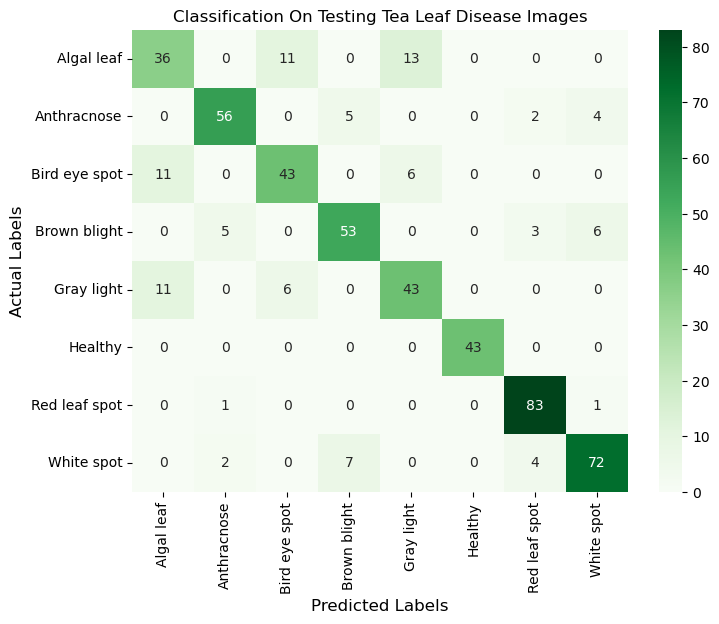

In [96]:
#cmap="YlGnBu"
#cmap="Blues"
#cmap="BuPu"
#cmap="Greens"

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
#fig, ax = plt.subplots(figsize=(10,10)) 
plt.figure(figsize=(8,6)) 
sns.heatmap(cm, annot=True, fmt=".0f",cmap="Greens",vmin=0,annot_kws={"size": 10},xticklabels=['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray light', 'Healthy', 'Red leaf spot', 'White spot'], yticklabels=['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray light', 'Healthy', 'Red leaf spot', 'White spot'])
font1 = {'size': 12}
font2 = {'size':12}
plt.title("Classification On Testing Tea Leaf Disease Images",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [97]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.8140417457305503


In [98]:
from sklearn import metrics
print ("Precision = ", metrics.precision_score(test_labels, prediction_RF,average='macro'))

Precision =  0.8113666396102526


In [99]:
from sklearn import metrics
print ("Recall = ", metrics.recall_score(test_labels, prediction_RF,average='micro'))

Recall =  0.8140417457305503


In [100]:
from sklearn import metrics
print ("F1 Score = ", metrics.f1_score(test_labels, prediction_RF,average='micro'))

F1 Score =  0.8140417457305503


The prediction for this image is:  ['algal leaf']
The actual label for this image is:  algal leaf


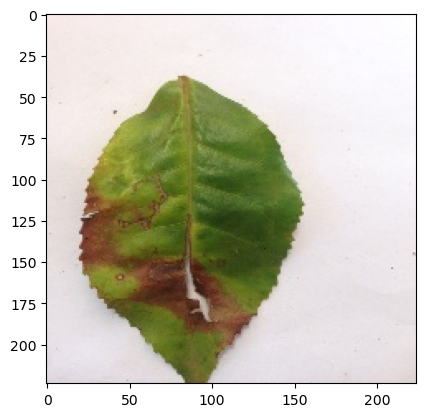

In [101]:
n=43 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)
prediction_RF = le.inverse_transform(prediction_RF)  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

# **DenseNet 121 as feature extractor and XGBoost as classifier**

In [45]:
!pip install xgboost

In [51]:
import xgboost as xgb

In [52]:
x_feature_xgboost_train = feature_extractor.predict(x_train)

In [64]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_feature_xgboost_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [65]:
x_feature_xgboost_test = feature_extractor.predict(x_test)
predicted_XGBClassifier = xgb_classifier.predict(x_feature_xgboost_test)
predicted_XGBClassifier = le.inverse_transform(predicted_XGBClassifier)
predicted_XGBClassifier

array(['algal leaf', 'red leaf spot', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'brown blight', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'brown blight', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'brown blight', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'white spot', 'algal leaf',
       'red leaf spot', 'algal leaf', 'algal l

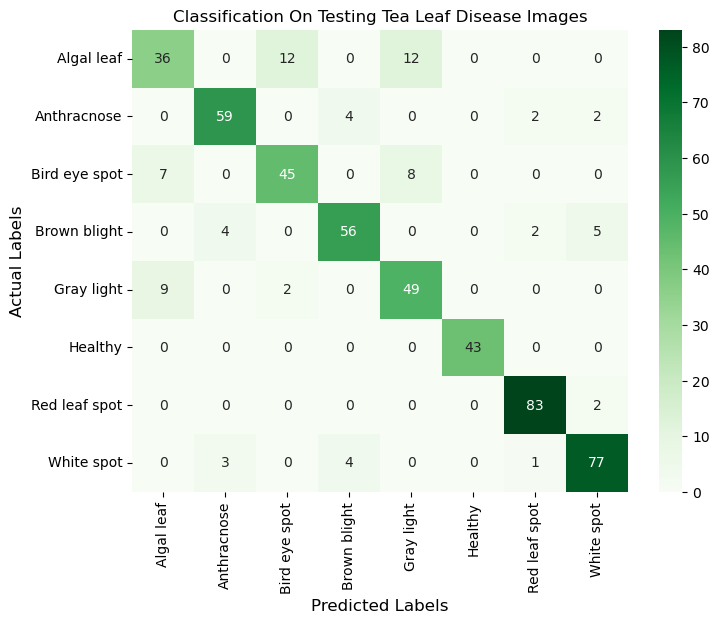

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels , predicted_XGBClassifier)
plt.figure(figsize=(8,6)) 
sns.heatmap(cm, annot=True, fmt=".0f",cmap="Greens",vmin=0,annot_kws={"size": 10},xticklabels=['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray light', 'Healthy', 'Red leaf spot', 'White spot'], yticklabels=['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray light', 'Healthy', 'Red leaf spot', 'White spot'])
font1 = {'size': 12}
font2 = {'size':12}
plt.title("Classification On Testing Tea Leaf Disease Images",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [68]:
print("Accuracy : " , metrics.accuracy_score(test_labels , predicted_XGBClassifier))

Accuracy :  0.8500948766603416


In [69]:
print("Precision : " , metrics.precision_score(test_labels , predicted_XGBClassifier,average='macro'))

Precision :  0.8465793166976523


In [70]:
print("Recall : " , metrics.recall_score(test_labels , predicted_XGBClassifier,average='macro'))

Recall :  0.8456796897863623


In [71]:
print("F1 Score : " , metrics.f1_score(test_labels , predicted_XGBClassifier,average='macro'))

F1 Score :  0.8451439788869988


The prediction for this image is :  ['algal leaf']
The actual label for this image is : algal leaf


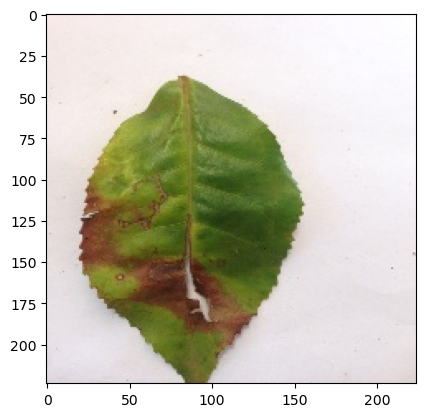

In [72]:
n = 43
img = x_test[n]
plt.imshow(img)
img = np.expand_dims(img , axis=0)
img_feature = feature_extractor.predict(img)
xgb_classifier = xgb_classifier.predict(img_feature)
xgb_classifier = le.inverse_transform(xgb_classifier)
print("The prediction for this image is : ", xgb_classifier)
print("The actual label for this image is :",test_labels[n])

# **DenseNet 121 as feature extractor and LightGBM as classifier**

In [109]:
!pip install lightgbm

In [73]:
import lightgbm as lgbm
LightGBM_Classifier = lgbm.LGBMClassifier()

In [74]:
x_feature_LGBMClassifier_train = feature_extractor.predict(x_train)
LightGBM_Classifier.fit(x_feature_LGBMClassifier_train , y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17340
[LightGBM] [Info] Number of data points in the train set: 2120, number of used features: 68
[LightGBM] [Info] Start training from score -2.178532
[LightGBM] [Info] Start training from score -2.057053
[LightGBM] [Info] Start training from score -2.178532
[LightGBM] [Info] Start training from score -2.057053
[LightGBM] [Info] Start training from score -2.178532
[LightGBM] [Info] Start training from score -2.494385
[LightGBM] [Info] Start training from score -1.821441
[LightGBM] [Info] Start training from score -1.830226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [75]:
x_feature_LGBMClassifier_test = feature_extractor.predict(x_test)
predicted_LGBMClassifier = LightGBM_Classifier.predict(x_feature_LGBMClassifier_test)
predicted_LGBMClassifier = le.inverse_transform(predicted_LGBMClassifier)
predicted_LGBMClassifier

array(['algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'brown blight', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'brown blight', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'white spot', 'brown blight', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'red leaf spot', 'algal leaf', 'algal leaf

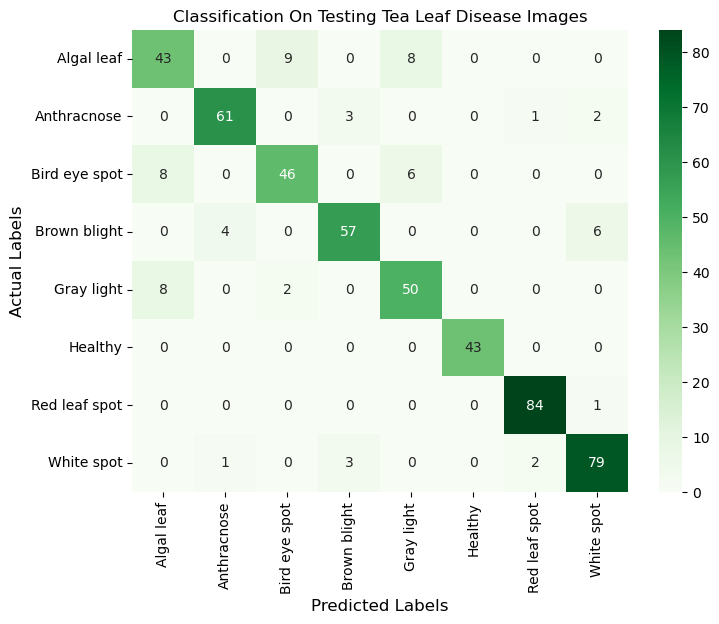

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels , predicted_LGBMClassifier)
plt.figure(figsize=(8,6)) 
sns.heatmap(cm, annot=True, fmt=".0f",cmap="Greens",vmin=0,annot_kws={"size": 10},xticklabels=['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray light', 'Healthy', 'Red leaf spot', 'White spot'], yticklabels=['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray light', 'Healthy', 'Red leaf spot', 'White spot'])
font1 = {'size': 12}
font2 = {'size':12}
plt.title("Classification On Testing Tea Leaf Disease Images",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [77]:
print("Accuracy : " , metrics.accuracy_score(test_labels , predicted_LGBMClassifier))

Accuracy :  0.8785578747628083


In [78]:
print("Precision : " , metrics.precision_score(test_labels , predicted_LGBMClassifier,average='macro'))

Precision :  0.8761662432865743


In [79]:
print("Recall : " , metrics.recall_score(test_labels , predicted_LGBMClassifier,average='macro'))

Recall :  0.8744384694176177


In [80]:
print("F1 Score : " , metrics.f1_score(test_labels , predicted_LGBMClassifier,average='macro'))

F1 Score :  0.8749650960748026


The prediction for this image is :  ['algal leaf']
The actual label for this image is : algal leaf


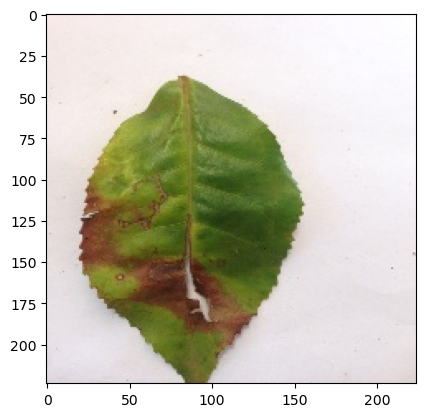

In [81]:
n = 43
img = x_test[n]
plt.imshow(img)
img = np.expand_dims(img , axis=0)
img_feature = feature_extractor.predict(img)
predicted_LGBMClassifier = LightGBM_Classifier.predict(img_feature)
predicted_LGBMClassifier = le.inverse_transform(predicted_LGBMClassifier)
print("The prediction for this image is : ", predicted_LGBMClassifier)
print("The actual label for this image is :",test_labels[n])

# **DenseNet 121 as feature extractor and CatBoost as classifier**

In [128]:
!pip install catboost

In [82]:
import catboost as cbt
CatBoost_Classifier =cbt.CatBoostClassifier()

In [83]:
x_feature_CatBoost_Classifier_train = feature_extractor.predict(x_train)

In [84]:
CatBoost_Classifier.fit(x_feature_CatBoost_Classifier_train , y_train)

Learning rate set to 0.082218
0:	learn: 1.9220647	total: 222ms	remaining: 3m 41s
1:	learn: 1.7959719	total: 273ms	remaining: 2m 16s
2:	learn: 1.7067792	total: 324ms	remaining: 1m 47s
3:	learn: 1.6179721	total: 375ms	remaining: 1m 33s
4:	learn: 1.5470409	total: 424ms	remaining: 1m 24s
5:	learn: 1.4746855	total: 474ms	remaining: 1m 18s
6:	learn: 1.4198960	total: 524ms	remaining: 1m 14s
7:	learn: 1.3655406	total: 576ms	remaining: 1m 11s
8:	learn: 1.3189891	total: 626ms	remaining: 1m 8s
9:	learn: 1.2717635	total: 676ms	remaining: 1m 6s
10:	learn: 1.2336197	total: 728ms	remaining: 1m 5s
11:	learn: 1.1995452	total: 779ms	remaining: 1m 4s
12:	learn: 1.1652727	total: 831ms	remaining: 1m 3s
13:	learn: 1.1331826	total: 881ms	remaining: 1m 2s
14:	learn: 1.1068888	total: 932ms	remaining: 1m 1s
15:	learn: 1.0788401	total: 983ms	remaining: 1m
16:	learn: 1.0540537	total: 1.03s	remaining: 59.8s
17:	learn: 1.0328251	total: 1.08s	remaining: 59.2s
18:	learn: 1.0130106	total: 1.14s	remaining: 58.7s
19:	le

In [85]:
x_feature_CatBoost_Classifier_test = feature_extractor.predict(x_test)
predicted_CatBoost_Classifier = CatBoost_Classifier.predict(x_feature_CatBoost_Classifier_test)
predicted_CatBoost_Classifier = np.ravel(predicted_CatBoost_Classifier) #https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
predicted_CatBoost_Classifier

array([1, 6, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 3, 3, 1, 1,
       7, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4,
       4, 4, 2, 4, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 4, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 2, 0,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 0, 4, 2, 4, 0, 2, 4, 2, 0, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 7, 3, 7, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 6, 3, 3, 3, 3, 6, 6, 3, 7, 3,
       3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       0, 2, 4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,

In [86]:
predicted_CatBoost_Classifier = le.inverse_transform(predicted_CatBoost_Classifier)
predicted_CatBoost_Classifier

array(['algal leaf', 'red leaf spot', 'brown blight', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'brown blight', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'brown blight', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'algal leaf', 'algal leaf',
       'algal leaf', 'algal leaf', 'white spot', 'algal leaf',
       'algal leaf', 'algal leaf', 'brown blig

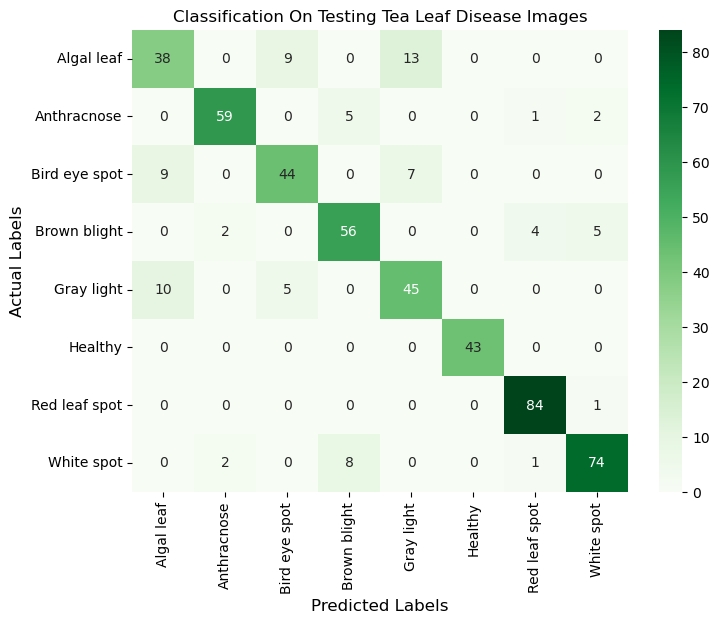

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_CatBoost_Classifier)
plt.figure(figsize=(8,6)) 
sns.heatmap(cm, annot=True, fmt=".0f",cmap="Greens",vmin=0,annot_kws={"size": 10},xticklabels=['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray light', 'Healthy', 'Red leaf spot', 'White spot'], yticklabels=['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray light', 'Healthy', 'Red leaf spot', 'White spot'])
font1 = {'size': 12}
font2 = {'size':12}
plt.title("Classification On Testing Tea Leaf Disease Images",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [88]:
print("Accuracy : " , metrics.accuracy_score(test_labels , predicted_CatBoost_Classifier))

Accuracy :  0.8406072106261859


In [89]:
print("Precision : " , metrics.precision_score(test_labels , predicted_CatBoost_Classifier,average='macro'))

Precision :  0.8376836932199495


In [90]:
print("Recall : " , metrics.recall_score(test_labels , predicted_CatBoost_Classifier,average='macro'))

Recall :  0.836488513315774


In [91]:
print("F1 Score : " , metrics.f1_score(test_labels , predicted_CatBoost_Classifier,average='macro'))

F1 Score :  0.8365980782255311


The prediction for this image is :  ['algal leaf']
The actual label for this image is : algal leaf


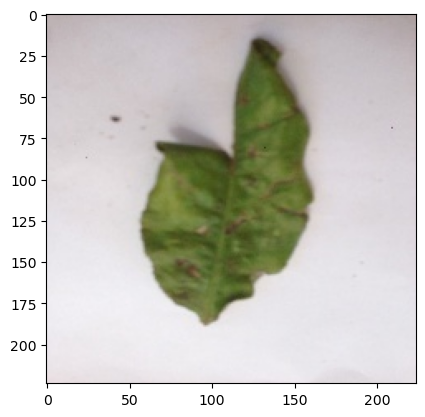

In [92]:
n = 50
img = x_test[n]
plt.imshow(img)
img = np.expand_dims(img , axis=0)
img_features = feature_extractor.predict(img)
predicted_CatBoost_Classifier =  CatBoost_Classifier.predict(img_features)
predicted_CatBoost_Classifier = np.ravel(predicted_CatBoost_Classifier)
predicted_CatBoost_Classifier = le.inverse_transform(predicted_CatBoost_Classifier)
print("The prediction for this image is : ", predicted_CatBoost_Classifier)
print("The actual label for this image is :",test_labels[n])